In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') 
import warnings
warnings.filterwarnings("ignore")
import logging 
logging.getLogger('tensorflow').setLevel(logging.FATAL)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
PROJECT_PATH = '../'
sys.path.insert(0, PROJECT_PATH)

In [280]:
from lv.dnn.dnnpipeline import DNNPipeline

In [281]:
ddp = DNNPipeline()

(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (10000, 1540) (10000, 5)
(1540,) (10000, 1540) (10000, 5)
(1540,) (10000, 1540) (10000, 5)
(1540,) (10000, 1540) (10000, 5)
(1540,) (10000, 1540) (10000, 5)
(1540,) (10000, 1540) (10000, 5)


In [289]:
ddp.p_tests["M"]

array([[-2.18132136e+00,  4.64796544e+03,  1.06424885e+00],
       [-1.04857990e+00,  3.99828387e+03,  9.68034260e-01],
       [-8.94329601e-01,  3.79831041e+03,  1.86854193e+00],
       ...,
       [-1.37635862e+00,  4.17847769e+03,  1.16830094e+00],
       [-1.34025162e+00,  3.58715326e+03,  5.29246106e-01],
       [-3.12854202e-01,  3.75899298e+03,  7.88682332e-01]])

In [291]:
ddp.y_trains

{}

In [276]:
a =np.array(ddp.dRs["M"]).T

In [279]:
a[:,[0,1,2]]

array([[-2.5e+00,  3.5e+03,  0.0e+00],
       [ 0.0e+00,  5.0e+03,  2.0e+00]])

In [267]:
a=ddp.y_tests["M"]["M"]

In [269]:
a.shape

(1000, 1, 5)

In [ ]:
plt.plot(a)

In [248]:
ddp.load_test_data()

(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)
(1540,) (1000, 1540) (1000, 5)


In [249]:
ddp.x_tests["M"].shape

(1000, 60)

In [237]:
ddp.prepare_RBF_data(1000, R="B")

(1540,) (1000, 1540) (1000, 5)


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [223]:
waves["BL"].shape

(537,)

In [200]:
a = dict.fromkeys(ddp.Wnms, dict.fromkeys(ddp.Rnms))

In [201]:
a

{'BL': {'M31G': None,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None},
 'RML': {'M31G': None,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None},
 'NL': {'M31G': None,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None}}

In [203]:
a["BL"]["M31G"]=1
a["NL"]["M31G"]=2

In [204]:
a

{'BL': {'M31G': 2,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None},
 'RML': {'M31G': 2,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None},
 'NL': {'M31G': 2,
  'MWW': None,
  'MWC': None,
  'BHB': None,
  'RHB': None,
  'DGG': None}}

In [186]:
a["X"]["aa"]=1

In [187]:
a

{'X': {'aa': 1}, 'Y': {'aa': 1}, 'Z': {'aa': 1}}

In [179]:
ddp.PC = {{}}

TypeError: unhashable type: 'dict'

In [178]:
ddp.prepare_PC(top=20)

AttributeError: 'DNNPipeline' object has no attribute 'PC'

In [169]:
R="C"
Rtest="M"

In [170]:
W="NL"
N_train=10000
lr=0.01
ddp.prepare(R, W, N_train=N_train,lr=lr)

(20, 293)
(1540,) (10000, 1540) (10000, 5)
(1540,) (1000, 1540) (1000, 5)
Layers: [20, 64, 32, 16, 3]


(10000, 20)
| EP 1000 |loss: 0.0005 | mean_: 0.0005 | val_l: 0.0005 | val_m: 0.0005 | lr: 0.0000 | 


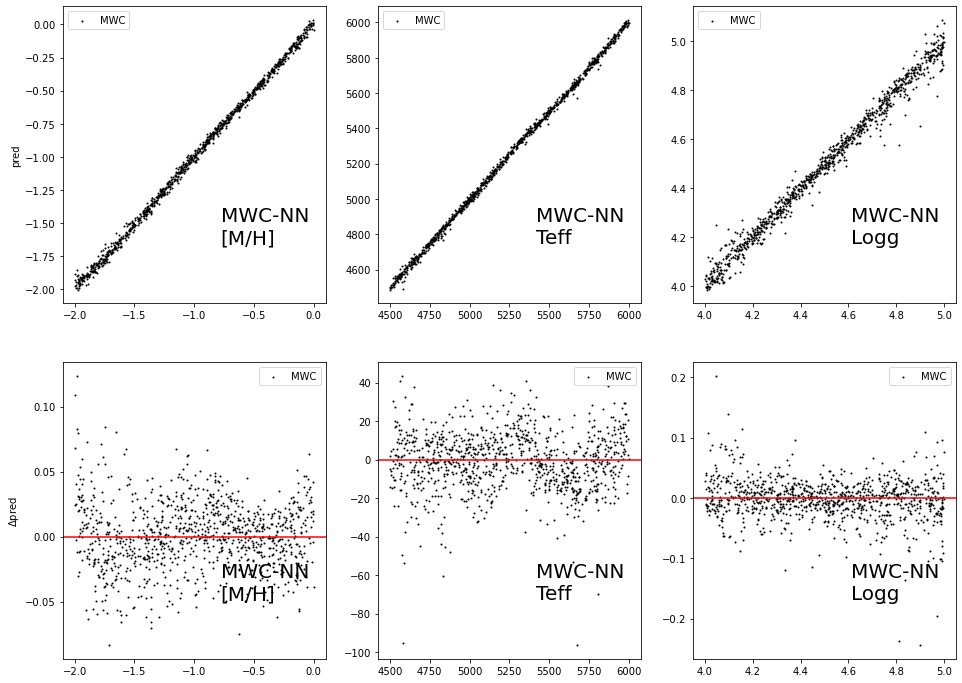

In [171]:
ep=1000
ddp.run(ep=ep)

(1540,) (10000, 1540) (10000, 5)


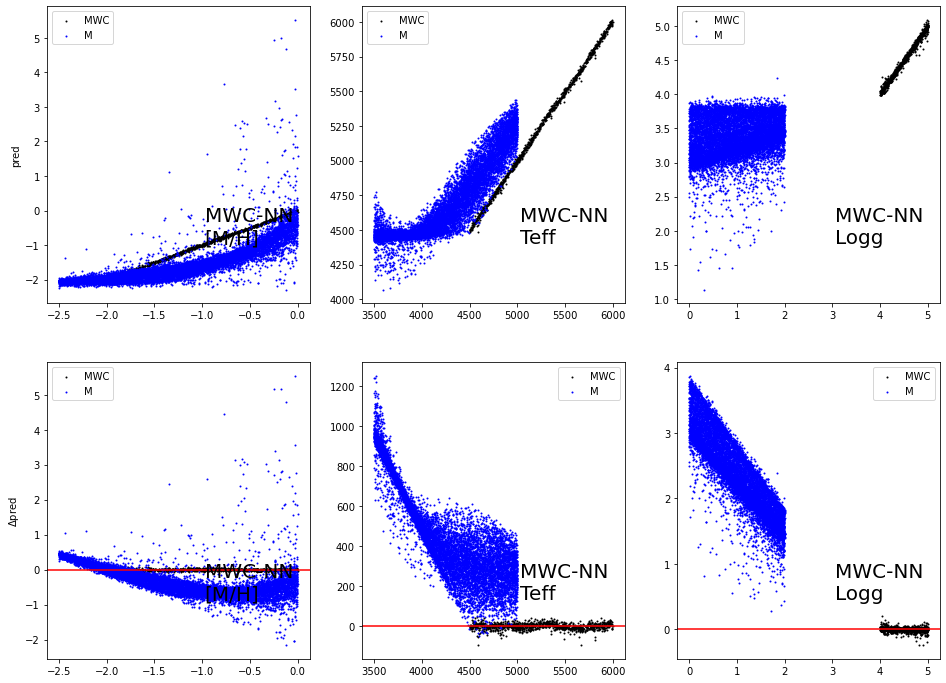

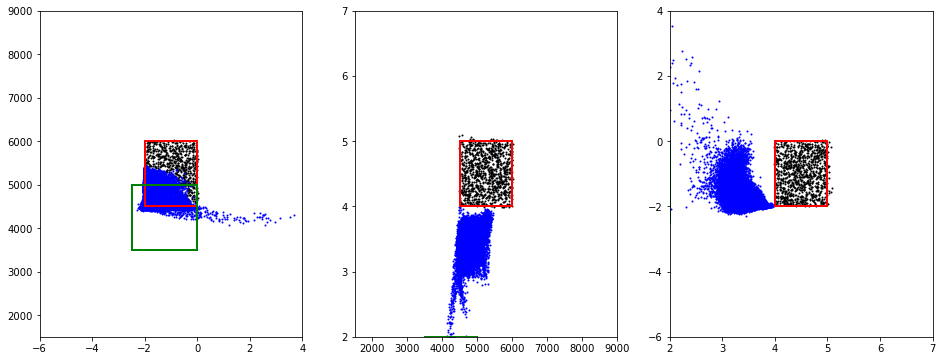

In [172]:
ddp.run_test_data(Rtest)